In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

In [3]:
# create a new plot with a title and axis labels
p = figure(title="Simple scatter example", x_axis_label='x', y_axis_label='y')

In [4]:
# add a line renderer with legend and line thickness to the plot
p.scatter(x, y, legend_label="Temp.", line_width=2)
p.toolbar.logo = None
p.toolbar_location = None

In [5]:
show(p)

In [6]:
import plotly.colors

def get_continuous_color(colorscale, intermed, mirror_diverge=False):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    if mirror_diverge:
        intermed = np.abs(intermed - 0.5)

    if intermed <= 0 or len(colorscale) == 1:
        return colorscale[0][1]
    if intermed >= 1:
        return colorscale[-1][1]

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    # noinspection PyUnboundLocalVariable
    return plotly.colors.find_intermediate_color(
        lowcolor=low_color, highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb")

In [14]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm


# get rectangle coords given the center and width and height
def plotRect(fig, x, y, width, height, splits = 100):

    viridis_colors, _ = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Reds)
    colorscale = plotly.colors.make_colorscale(viridis_colors)

    rects = []

    start_coords = [x - width/2, y - height/2]

    split_size = width / splits

    for split in range(splits):
        start_x = start_coords[0] + split_size * split - 0.01
        start_y = start_coords[1] 

        end_x = start_coords[0] + split_size * (1+split)
        end_y = start_coords[1] + height

        dens = norm.pdf( np.abs(split/splits - 0.5)*3)
        color = get_continuous_color(colorscale,dens)

        fig.add_trace(go.Scatter(x=[start_x, start_x, end_x, end_x], y=[start_y, end_y, end_y, start_y], fill="toself", mode="none", fillcolor=color))
        fig.add_trace(go.Scatter(x=[x], y=[y], mode="markers", marker_color="black"))
    
    fig.add_trace(go.Scatter(x=[start_coords[0], start_coords[0], end_x, end_x, start_coords[0]], y=[start_coords[1], end_y, end_y, start_coords[1],start_coords[1]], mode="lines", line_color="black", line_width=0.5))
        

    return fig

s = [np.random.normal(i-4, 1, 1000) for i in range(11)]
# shuffle list
np.random.shuffle(s)


config = {'staticPlot': True}

fig= go.Figure(
    layout=go.Layout(
        title="Simple scatter example",
        width=500,
        height=500,
        template="ggplot2",
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode=False,
        colorscale= {"sequential":'tempo'},
        showlegend=False
    ))

for i, ss in enumerate(s):
    plotRect(fig, ss.mean(), i, 3, .3)
    


# fig.add_trace(go.Box(y=a))
# fig.add_trace(go.Box(y=b, hoverinfo="skip"))
# fig.add_trace(go.Box(y=c, hoverinfo="skip"))

fig.update_xaxes(showgrid=False, showline=True, linewidth=2, linecolor="black")
fig.update_yaxes(showgrid=False, showline=True, linewidth=2, linecolor="black")



In [8]:
fig.write_image("fig1.pdf")

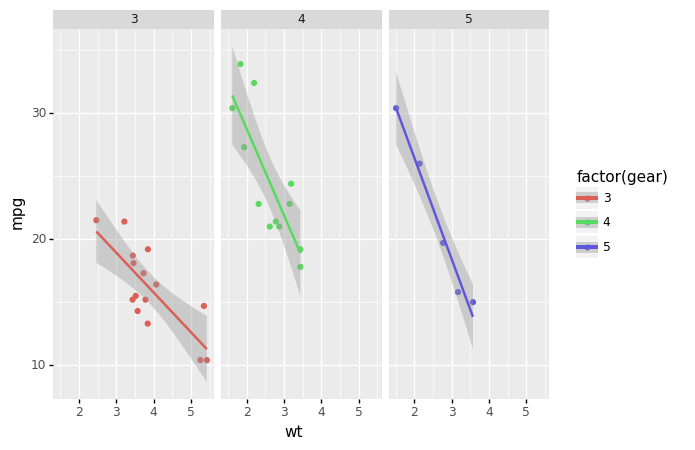

<ggplot: (366015528)>

In [15]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))